Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [7]:
DESeq2 = pd.read_csv('fission_DESeq2_tst.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_fission_normalized_counts.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_fission_normalized_counts.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 6)
(6459, 6)


In [8]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPBC2F12.09c,174.671162,-2.657185,0.751020,98.267454,1.224945e-19,7.911920e-16
SPAC1002.18,444.504950,-0.051168,0.203134,57.672042,3.675626e-11,1.187043e-07
SPAC1002.19,336.373207,-0.392611,0.576457,42.999342,3.696211e-08,7.957941e-05
SPAC1002.17c,261.773133,-1.138898,0.608548,38.940974,2.440696e-07,3.941114e-04
SPNCRNA.1628,21.638834,0.201416,0.511589,28.035566,3.582068e-05,4.189223e-02
...,...,...,...,...,...,...
SPCPJ732.01,228.644608,0.105057,0.334712,0.139283,9.996335e-01,9.999412e-01
SPAC25H1.08c,1329.688464,-0.011105,0.183171,0.114618,9.997729e-01,9.999412e-01
SPAC29A4.05,456.659427,0.025396,0.161020,0.113559,9.997780e-01,9.999412e-01
SPCC1919.12c,741.087681,0.042403,0.210459,0.102344,9.998281e-01,9.999412e-01


In [9]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPNCRNA.178,-1.212010e+08,-6.708715e+01,-64.307077,1.212009e+08,0:00:12.110646,1
SPNCRNA.1361,-1.240081e+02,-6.791141e+01,37.673479,9.377015e+01,0:00:06.027988,0
SPNCRNA.1569,-9.140075e+01,-4.842114e+01,19.361631,6.234124e+01,0:00:04.378578,0
SPCC794.01c,-1.389652e+02,-7.530465e+01,-7.356111,5.630441e+01,0:00:09.392057,5
SPAC890.04c,-3.190265e+02,-1.324986e+02,-133.280704,5.324719e+01,0:00:18.741907,0
...,...,...,...,...,...,...
SPBC28E12.06c,-2.348119e+02,-1.385976e+02,-137.676382,-4.146210e+01,0:01:32.603082,7
SPBC19F5.02c,-2.628990e+02,-1.684151e+02,-140.608702,-4.612480e+01,0:00:31.341067,1
SPAC25B8.15c,-1.772589e+02,-1.300573e+02,-96.268944,-4.906735e+01,0:01:09.016023,5
SPBC21B10.09,-2.198920e+02,-1.620676e+02,-117.320772,-5.949635e+01,0:00:37.777389,1


In [10]:
GPcounts_NB_sorted.index.values

array(['SPNCRNA.178', 'SPNCRNA.1361', 'SPNCRNA.1569', ..., 'SPAC25B8.15c',
       'SPBC21B10.09', 'SPAC25B8.06c'], dtype=object)

In [11]:
genes_name = ['SPNCRNA.750','SPBTRNAARG.07','SPNCRNA.735','SPBPB2B2.06c','SPAC869.06c','SPCC1281.04','SPBC1711.14','SPAC11D3.01c']
GPcounts_NB.loc[genes_name]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPNCRNA.750,-79.174474,-44.108208,-35.905200,-0.838934,0:00:04.342802,0
SPBTRNAARG.07,-222.907242,-105.371804,-115.171853,2.363585,0:00:09.586940,0
SPNCRNA.735,-132.372345,-67.077120,-63.837609,1.457615,0:00:13.758268,0
SPBPB2B2.06c,-120.445680,-61.098892,-58.095126,1.251662,0:00:04.391545,0
SPAC869.06c,-111.685654,-58.629911,-51.150555,1.905189,0:00:06.171576,0
SPCC1281.04,-146.678699,-77.813950,-65.148275,3.716473,0:00:05.431575,0
SPBC1711.14,-85.597822,-46.000490,-38.378030,1.219301,0:00:06.391446,1
SPAC11D3.01c,-231.929048,-121.150459,-109.555620,1.222970,0:00:40.072396,5


In [12]:
GPcounts_G.loc[genes_name]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPNCRNA.750,-43.572648,-26.310056,-21.358844,-4.096252,0:00:01.556489,0
SPBTRNAARG.07,-19.993206,-8.492372,-12.267570,-0.766736,0:00:01.667653,0
SPNCRNA.735,-31.001777,-21.081304,-15.508935,-5.588462,0:00:00.879339,0
SPBPB2B2.06c,-48.930831,-26.108318,-22.617742,0.204771,0:00:00.807277,0
SPAC869.06c,-48.435691,-22.026555,-25.785419,0.623716,0:00:00.857678,0
SPCC1281.04,-46.569713,-27.515498,-18.106411,0.947803,0:00:00.999005,0
SPBC1711.14,-37.099158,-21.487792,-17.138763,-1.527397,0:00:00.836477,0
SPAC11D3.01c,-29.480800,-18.182720,-13.617617,-2.319537,0:00:00.937530,0


In [13]:
D = GPcounts_NB.shape[0]
true_label = np.zeros(D)
for j in range(D):
    if GPcounts_NB['log_likelihood_ratio'][j] > 0:
        true_label[j] = 1
labels = pd.DataFrame(true_label, index =GPcounts_NB.index.values, columns =['label'])
GPcounts_NB = pd.concat([GPcounts_NB,labels],axis = 1)

In [14]:
TP_genes_NB = list(GPcounts_NB.loc[(GPcounts_NB['log_likelihood_ratio'] > 0)&(GPcounts_NB['log_likelihood_ratio'] < 4)&(GPcounts_NB['label']==1.0)].index.values)
len(TP_genes_NB)


719

In [15]:
FP_genes_G = list(GPcounts_G.loc[(GPcounts_G['log_likelihood_ratio'] < 0)&(GPcounts_NB['label']==1.0)].index.values)
FP_genes_G

['SPAC212.04c',
 'SPAC1F8.06',
 'SPAC11D3.01c',
 'SPAC11D3.02c',
 'SPNCRNA.609',
 'SPAC5H10.06c',
 'SPAC5H10.10',
 'SPNCRNA.624',
 'SPNCRNA.628',
 'SPAC18B11.07c',
 'SPAC12G12.15',
 'SPAC12G12.14c',
 'SPNCRNA.638',
 'SPAC12G12.03',
 'SPATRNAPRO.01',
 'SPAC1751.02c',
 'SPNCRNA.653',
 'SPNCRNA.654',
 'SPAC227.19c',
 'SPAC227.05',
 'SPAC227.11c',
 'SPAC1F3.05',
 'SPAC1D4.01',
 'SPAC1D4.05c',
 'SPAC1296.05c',
 'SPAC222.04c',
 'SPAC222.16c',
 'SPAC821.05',
 'SPNCRNA.220',
 'SPAC1A6.01c',
 'SPAC1A6.04c',
 'SPAC19E9.01c',
 'SPAC3A12.11c',
 'SPAC3A12.15',
 'SPAC5D6.10c',
 'SPAC167.04',
 'SPAC167.09',
 'SPAC23H4.17c',
 'SPAP27G11.03',
 'SPAC17A5.16',
 'SPAP11E10.02c',
 'SPAPB1A10.11c',
 'SPNCRNA.775',
 'SPAC9G1.05',
 'SPAC17H9.07',
 'SPNCRNA.186',
 'SPAC631.01c',
 'SPAC23C11.07',
 'SPAC1783.01',
 'SPAC18G6.03',
 'SPAC4G9.04c',
 'SPAC13G7.04c',
 'SPAC17G8.15',
 'SPAC15F9.01c',
 'SPAC32A11.01',
 'SPAC19A8.06',
 'SPAC23H3.07c',
 'SPAC823.09c',
 'SPAC7D4.13c',
 'SPAC7D4.10',
 'SPNCRNA.842',
 'SPAC7

In [23]:
# SPAPB1A11.02,SPBC20F10.08c,SPNCRNA.750,SPAC15F9.02,SPNCRNA.827,SPAC1B3.16c
best =set(FP_genes_G).intersection(TP_genes_NB)
list(best)

['SPNCRNA.403',
 'SPNCRNA.1506',
 'SPAC3G6.08',
 'SPAC2E12.03c',
 'SPBC21C3.09c',
 'SPCTRNAPHE.05',
 'SPAC1751.02c',
 'SPBC660.17c',
 'SPBC31F10.10c',
 'SPNCRNA.783',
 'SPAC8C9.17c',
 'SPNCRNA.14',
 'SPNCRNA.1674',
 'SPBC1711.18',
 'SPBC1289.01c',
 'SPCC1450.08c',
 'SPNCRNA.215',
 'SPAC6F6.08c',
 'SPAC11H11.03c',
 'SPCC16C4.07',
 'SPBC3E7.06c',
 'SPNCRNA.1436',
 'SPAC1F8.06',
 'SPCC1682.01',
 'SPNCRNA.186',
 'SPBTRNAILE.07',
 'SPNCRNA.690',
 'SPAC3A12.08',
 'SPNCRNA.1504',
 'SPBC9B6.11c',
 'SPAC2F3.18c',
 'SPAC869.09',
 'SPBC21C3.18',
 'SPAC4H3.17',
 'SPAC15A10.17',
 'SPCC364.02c',
 'SPBC11C11.02',
 'SPBPB8B6.03',
 'SPNCRNA.1392',
 'SPAC27F1.02c',
 'SPBC24C6.05',
 'SPNCRNA.554',
 'SPCC1919.11',
 'SPNCRNA.1348',
 'SPBC36.12c',
 'SPCC16C4.20c',
 'SPAC1A6.11',
 'SPAC5H10.06c',
 'SPAC644.11c',
 'SPAC24B11.07c',
 'SPBC1105.07c',
 'SPAC8F11.08c',
 'SPAPB8E5.08',
 'SPAC13G7.09c',
 'SPCTRNAGLU.10',
 'SPAC3G9.11c',
 'SPAC1B3.10c',
 'SPCC4B3.10c',
 'SPATRNAVAL.03',
 'SPBC13E7.11',
 'SPNCRNA.1404

In [10]:
GPcounts_NB.loc[best]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter,label
SPNCRNA.403,-91.770893,-46.981222,-42.578502,2.211169,0:00:04.194948,0,1.0
SPAC890.04c,-319.026452,-132.498557,-133.280704,53.247191,0:00:18.741907,0,1.0
SPNCRNA.1506,-97.544473,-51.869156,-44.839138,0.836179,0:00:05.245191,0,1.0
SPAC3G6.08,-182.656091,-91.174235,-89.426452,2.055404,0:00:15.766559,0,1.0
SPAC2E12.03c,-149.853250,-75.190241,-74.569611,0.093398,0:00:21.894134,1,1.0
...,...,...,...,...,...,...,...
SPAC18B11.07c,-211.732491,-103.353372,-102.288096,6.091023,0:01:56.168587,2,1.0
SPNCRNA.137,-47.501083,-23.087172,-22.970336,1.443575,0:00:05.364051,0,1.0
SPRRNA.52,-409.441254,-205.229158,-201.142038,3.070058,0:00:08.556444,0,1.0
SPNCRNA.624,-167.269892,-86.398368,-80.474363,0.397162,0:00:17.324200,0,1.0


In [11]:
GPcounts_G.loc[best]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPNCRNA.403,-47.947530,-26.698237,-22.565611,-1.316318,0:00:00.834164,0
SPAC890.04c,8.010347,-4.366176,-5.669433,-18.045956,0:00:04.001665,0
SPNCRNA.1506,-39.608790,-23.120723,-18.119855,-1.631788,0:00:01.016970,0
SPAC3G6.08,3.730842,-1.278690,0.484529,-4.525004,0:00:01.419349,0
SPAC2E12.03c,-50.523236,-30.781171,-30.344311,-10.602246,0:00:00.812223,0
...,...,...,...,...,...,...
SPAC18B11.07c,23.127788,6.160783,13.605724,-3.361281,0:00:01.358733,0
SPNCRNA.137,-35.067245,-19.928059,-15.819866,-0.680679,0:00:01.683229,0
SPRRNA.52,-25.110573,-19.060978,-14.483478,-8.433882,0:00:01.330363,1
SPNCRNA.624,-22.537823,-16.614142,-6.223019,-0.299338,0:00:02.657147,1


In [12]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPAC186.05c,-70.873089,-36.637210,1.589222,35.825101,0:00:01.790999,3
SPAC823.10c,-42.056818,-23.739097,-1.073034,17.244686,0:00:03.035054,1
SPNCRNA.1457,-23.496468,-4.162467,-2.400009,16.933992,0:00:00.867672,0
SPBC23G7.10c,-73.096626,-35.451329,-20.843167,16.802131,0:00:00.857030,0
SPNCRNA.1628,-46.678903,-26.882433,-3.604953,16.191517,0:00:00.773564,0
...,...,...,...,...,...,...
SPBC651.08c,22.872301,-2.672628,0.278872,-25.266057,0:00:02.542066,0
SPAC4A8.16c,21.464484,-3.284267,-0.624653,-25.373404,0:00:01.678234,0
SPBC4C3.05c,22.430228,-0.396928,-2.815008,-25.642164,0:00:00.785859,0
SPAC1B1.03c,28.771086,0.263147,2.756380,-25.751558,0:00:00.708642,0


0.1
645
-0.9997051390112625 0.0


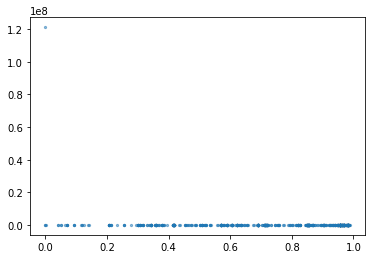

-0.9997051390112625 0.0


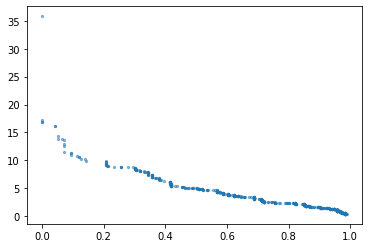

0.2
1291
-0.9373712609356691 0.0


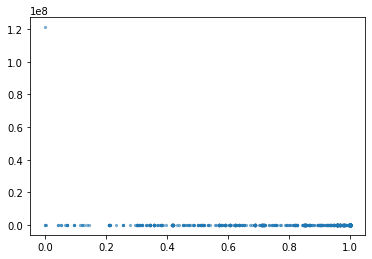

-0.9373712609356691 0.0


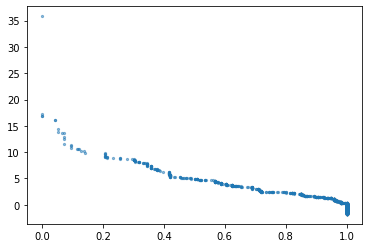

0.30000000000000004
1937
-0.841439372177824 0.0


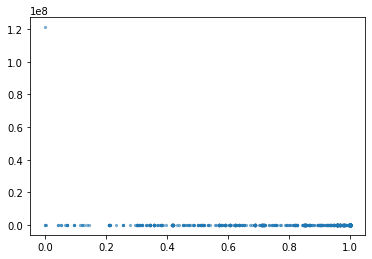

-0.841439372177824 0.0


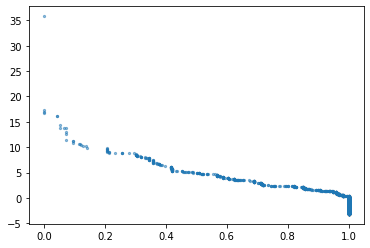

0.4
2583
-0.7630110684302743 0.0


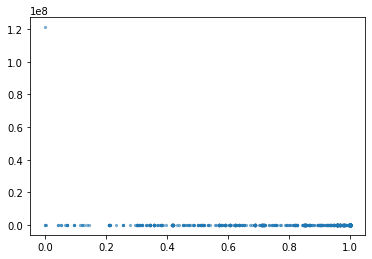

-0.7630110684302743 0.0


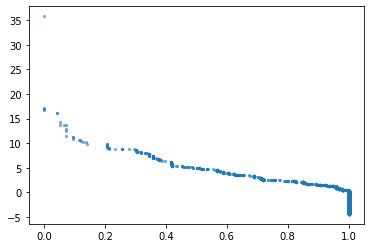

0.5
3229
-0.7011940343062308 0.0


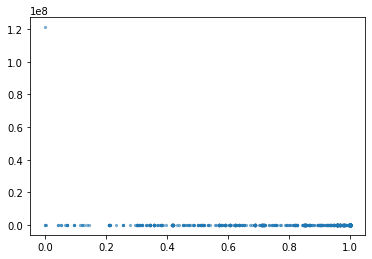

-0.7011940343062308 0.0


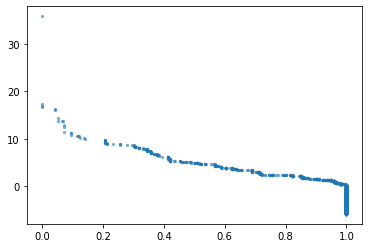

0.6000000000000001
3875
-0.6516154363753862 0.0


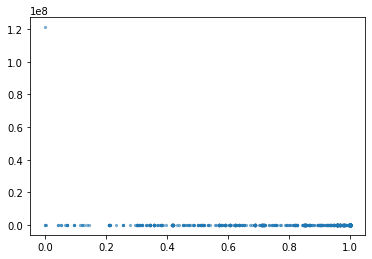

-0.6516154363753862 0.0


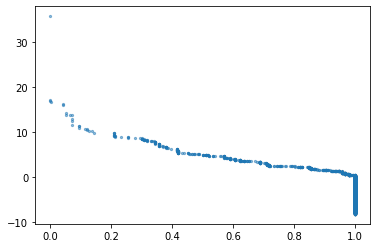

0.7000000000000001
4521
-0.610942480382402 0.0


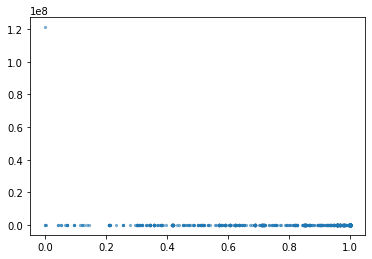

-0.610942480382402 0.0


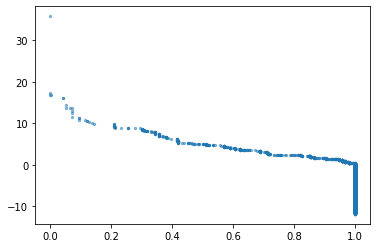

0.8
5167
-0.5768847636756292 0.0


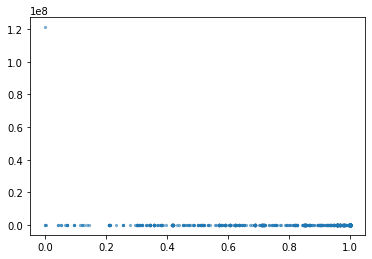

-0.5768847636756292 0.0


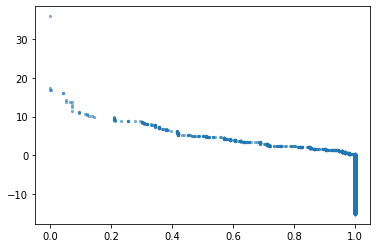

0.9
5813
-0.547865150517042 0.0


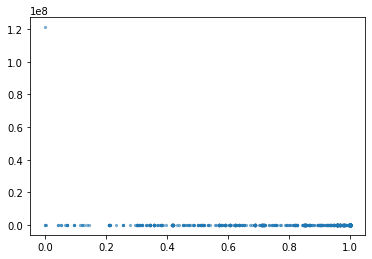

-0.547865150517042 0.0


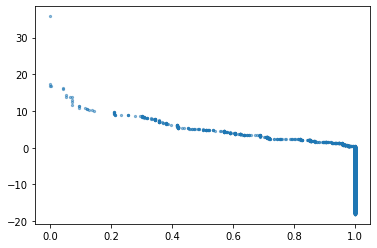

1.0
6459
-0.5227733222449342 0.0


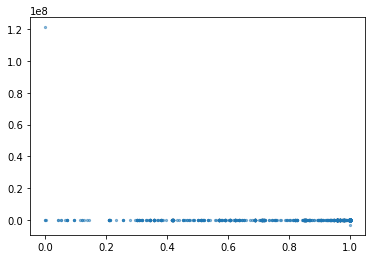

-0.5227733222449342 0.0


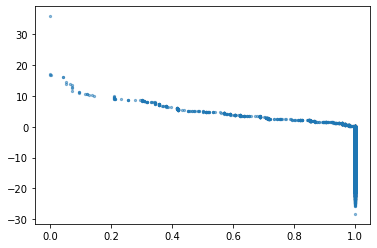

In [13]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    print(int(len(DESeq_id) * percentage[count]))
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    '''
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    '''
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_NB.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_G.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    '''
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
    '''

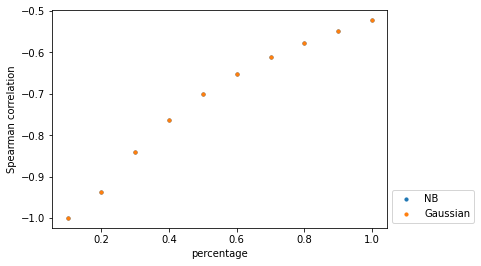

In [14]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [15]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter,label
SPBC2F12.09c,-174.976754,-80.352145,-87.323485,7.301124,0:00:06.120096,0,1.0
SPAC1002.18,-226.384670,-107.569440,-117.000627,1.814603,0:00:17.690476,0,1.0
SPAC1002.19,-202.660708,-94.850695,-107.827498,-0.017484,0:00:19.019298,5,0.0
SPAC1002.17c,-201.217921,-100.250760,-104.801402,-3.834241,0:00:14.967517,4,0.0
SPNCRNA.1628,-139.451680,-73.462453,-68.611450,-2.622223,0:00:19.401555,0,0.0
...,...,...,...,...,...,...,...
SPCPJ732.01,-207.285607,-104.200644,-103.266585,-0.181622,0:00:29.746720,1,0.0
SPAC25H1.08c,-248.684348,-124.602910,-123.914137,0.167301,0:00:48.957116,4,1.0
SPAC29A4.05,-197.530466,-102.240791,-107.678847,-12.389172,0:00:50.106077,1,0.0
SPCC1919.12c,-235.852759,-130.325294,-130.772579,-25.245114,0:00:35.756062,5,0.0


In [16]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,time,failure counter
SPBC2F12.09c,-46.120961,-21.220519,-20.498833,4.401609,0:00:01.160820,0
SPAC1002.18,-11.542041,-2.026259,-8.955544,0.560238,0:00:01.008548,0
SPAC1002.19,-42.175679,-14.060461,-27.210960,0.904259,0:00:00.781584,0
SPAC1002.17c,-40.821872,-21.013584,-23.029228,-3.220940,0:00:00.862096,0
SPNCRNA.1628,-46.678903,-26.882433,-3.604953,16.191517,0:00:00.773564,0
...,...,...,...,...,...,...
SPCPJ732.01,-12.225816,-5.430643,-1.531365,5.263809,0:00:01.337134,1
SPAC25H1.08c,10.873140,6.333973,5.516637,0.977471,0:00:01.636515,1
SPAC29A4.05,23.150929,8.614185,6.693722,-7.843022,0:00:01.301971,0
SPCC1919.12c,0.506387,-11.866469,-12.227088,-24.599944,0:00:00.823580,0


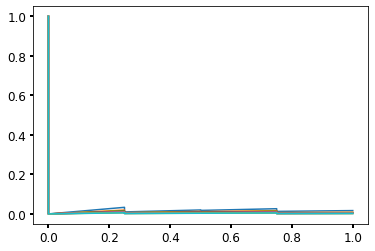

In [17]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()

dfs = [GPcounts_G_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= .005 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])

        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        plt.tick_params(labelsize='large', width=2) 
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        
    plt.show()


{0.0: 6453, 1.0: 6}
{0.0: 6443, 1.0: 16}
{0.0: 6437, 1.0: 22}


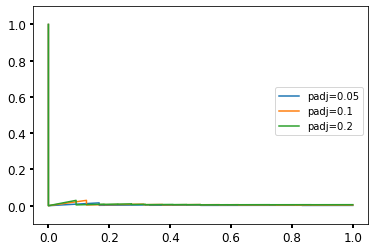

{0.0: 6453, 1.0: 6}
{0.0: 6443, 1.0: 16}
{0.0: 6437, 1.0: 22}


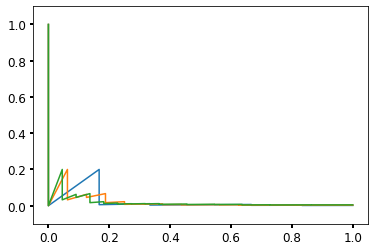

In [18]:
padj = [.05,.1,.2]
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(3):
        true_label = np.zeros(D)
  

        for j in range(D):
            if DESeq_sorted['padj'][j] <= padj[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='padj='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
